# Izhikevich Neuron Model

### model is described using two variables v and u.

## ${v}' = 0.04{v}^{2} -5{v} + 140 - {u} + {I} $


## ${u}' = {a} ({b}{v} - {u} )  $

## If $ {v} > {30mV} $
## Then ${v} = {c} $  and $ {u} = {u} + {d} $

### Here we are taking v as var1 and u as var2 in the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [40]:
def get_next_state(prev_state,model_params,dt):
    curr_state = np.zeros(2)
    if prev_state[0] > 30:
        curr_state[0] = model_params[2]
        curr_state[1] = prev_state[1] + model_params[3]
    else:
        curr_state[0] = prev_state[0]+ dt*(0.04*prev_state[0]**2 + 5*prev_state[0] + 140 - prev_state[1] + model_params[4])
        curr_state[1] = prev_state[1]+ dt*(model_params[0]*(model_params[1]*prev_state[0] - prev_state[1]))
    return curr_state

In [41]:
# get all values of var2 for the given range of var1 when d (var1)/dt = 0
def get_var1_nullcline(model_params,var1_range):
    var1_nullcline = np.zeros(len(var1_range))
    for i in range(len(var1_range)):
        var1_nullcline[i] = 0.04*var1_range[i]**2 + 5*var1_range[i] + 140 - model_params[4]
    return var1_nullcline

In [42]:
# get all values of var2 for the given range of var1 when d (var2)/dt = 0
def get_var2_nullcline(model_params,var2_range):
    var2_nullcline = np.zeros(len(var2_range))
    for i in range(len(var2_range)):
        var2_nullcline[i] = model_params[1]*var2_range[i]
    return var2_nullcline

In [43]:
def find_freq(states):
    var1=states[:,0]
    peaks=find_peaks(var1)[0]

    for i in peaks:
        if(var1[i]<0):
            peaks=np.delete(peaks,np.where(peaks==i))
    ## calc rate
    dt=100
    frarr=[]
    for i in range(0,1000,dt):
       fr= ((i < peaks) & (peaks < i+dt)).sum()
       frarr.append(fr/dt)
    #print(frarr)
    return frarr

In [44]:
tstop = 100 # time to simulate

dt = .1 #ms discrete time step
# Initialise model parameters
params = [0.02,0.2,-50,2,15] #a,b,c,d,I for regular spiking neuron
params1 = [1,1,1,1,1] #a,b,c,d,I for Fast spiking neuron

In [45]:
params_rs=[0.02,0.2,-65,8,10]
params_ib=[0.02,0.2,-55,4,10]
params_ch=[0.02,0.2,-50,2,10]
params_fs=[0.1,0.2,-65,2,10]
params_tc=[0.02,0.25,-65,0.05,10]
params_rz=[0.1,0.27,-65,2,10]
params_lts=[0.02,0.25,-65,2,10]

For model parameters [0.02, 0.2, -65, 8, 10]


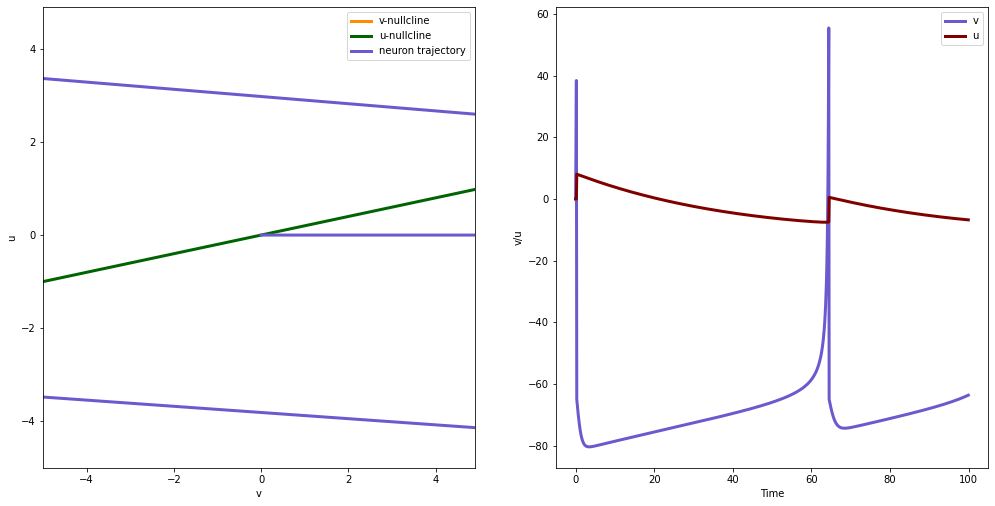

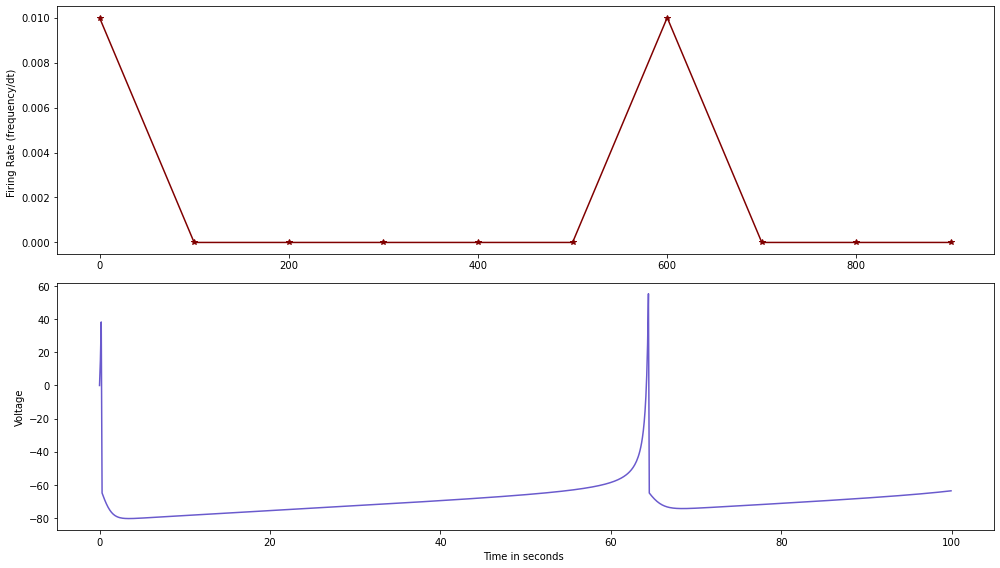

For model parameters [0.02, 0.2, -55, 4, 10]


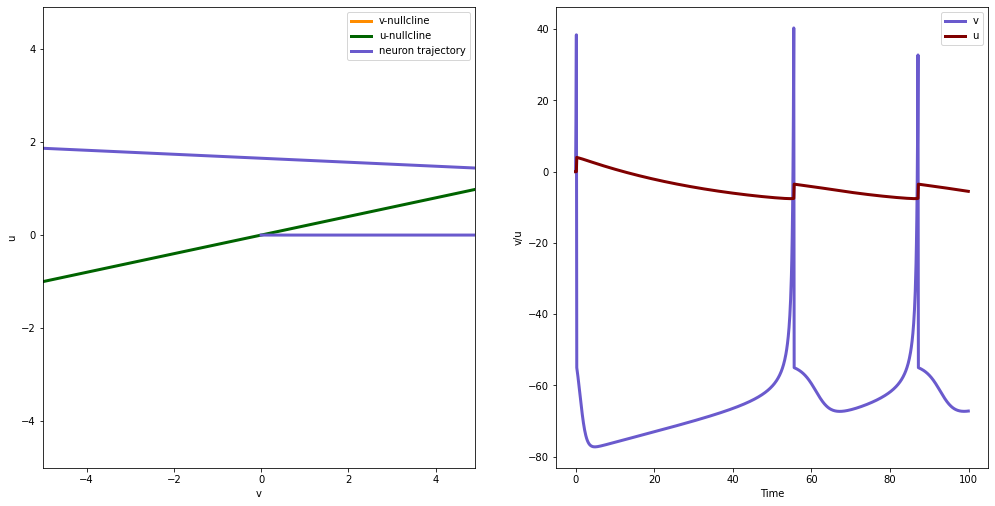

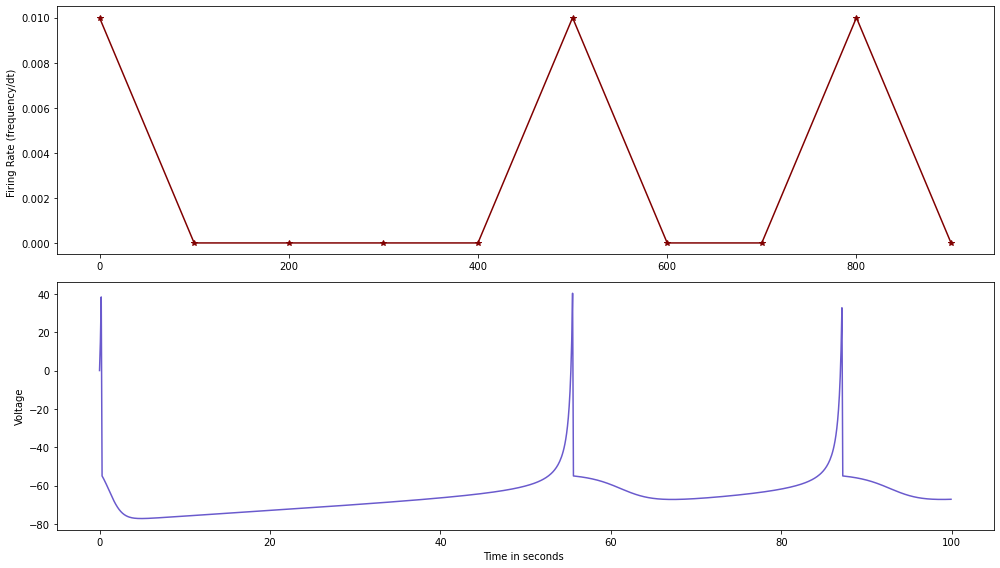

For model parameters [0.02, 0.2, -50, 2, 10]


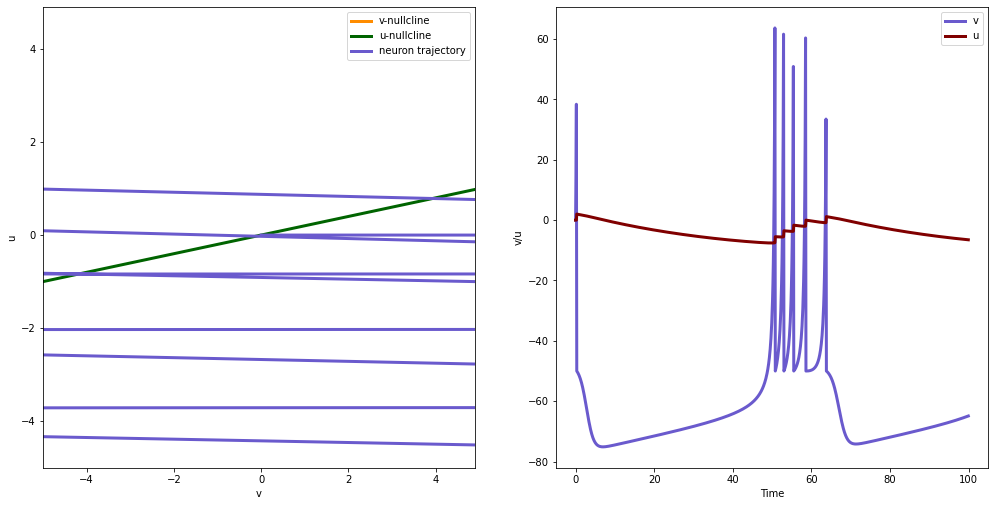

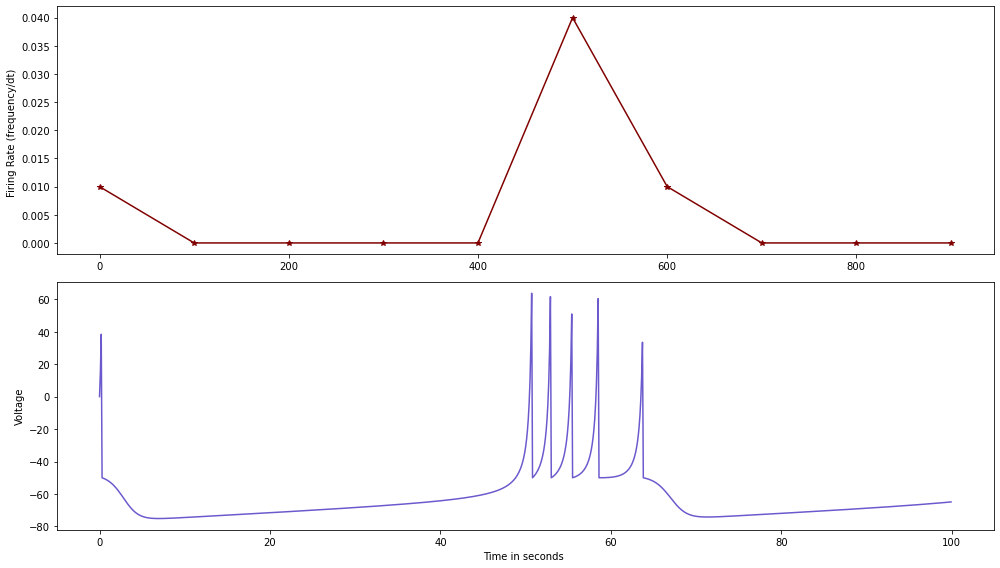

For model parameters [0.1, 0.2, -65, 2, 10]


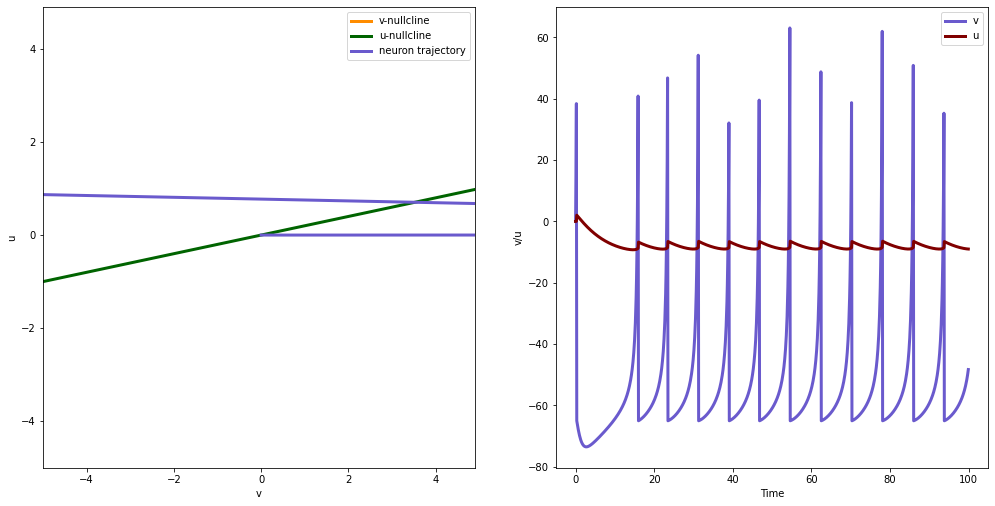

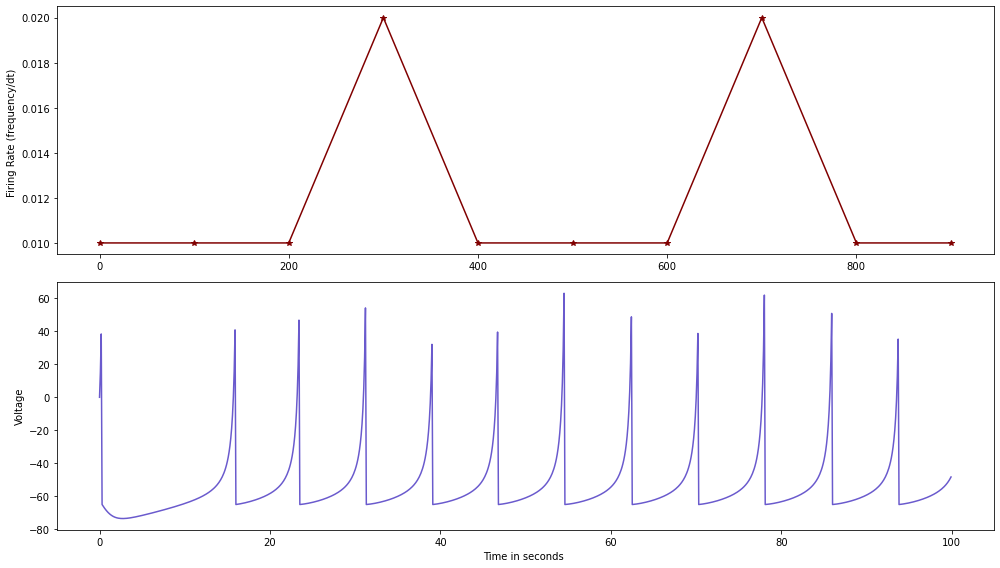

For model parameters [0.02, 0.25, -65, 0.05, 10]


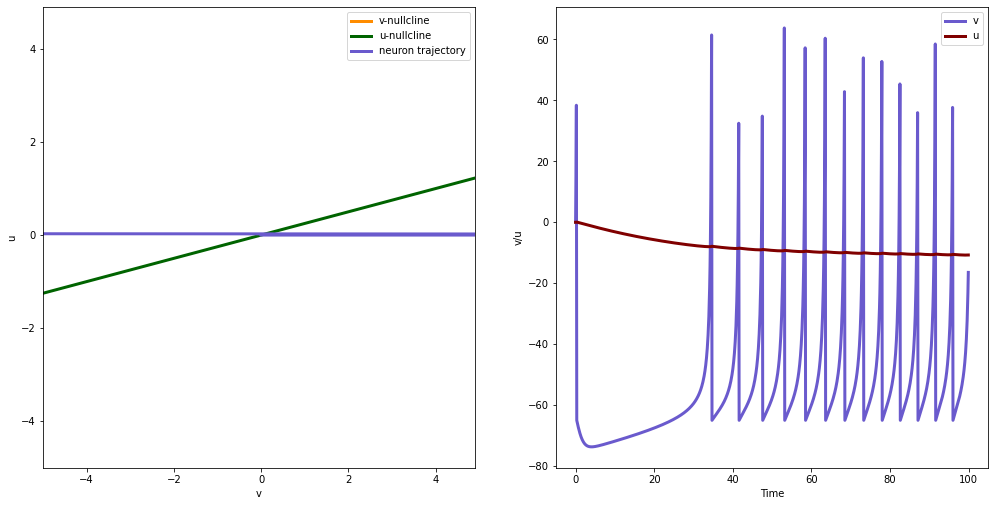

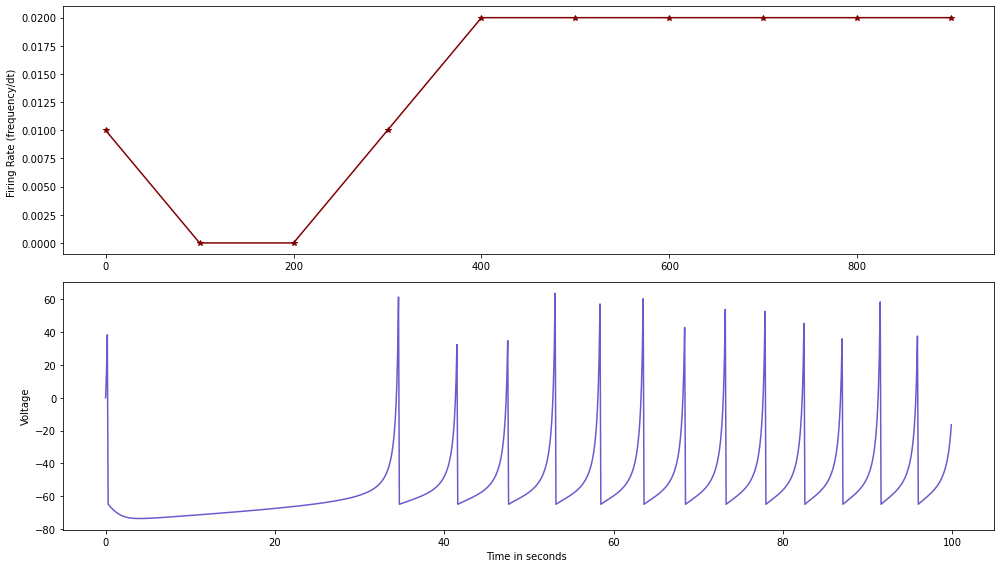

For model parameters [0.1, 0.27, -65, 2, 10]


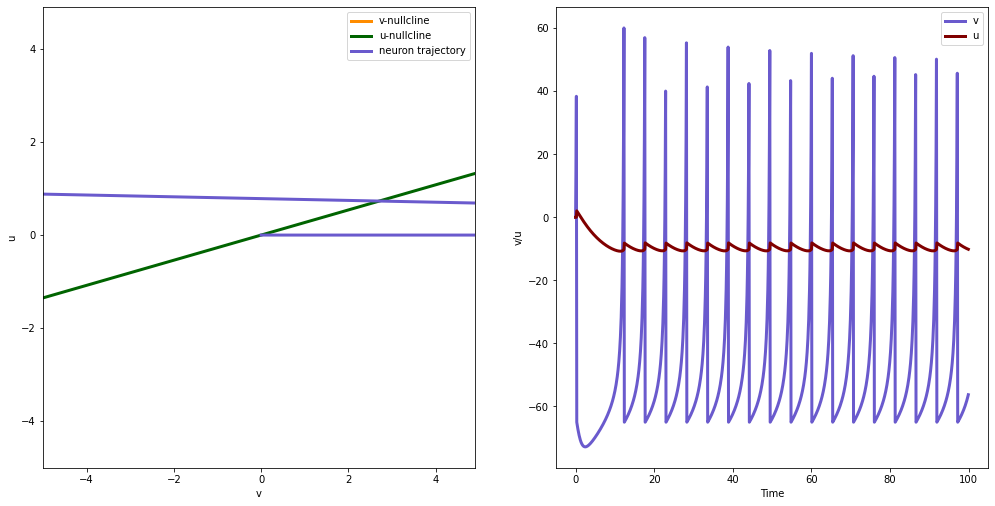

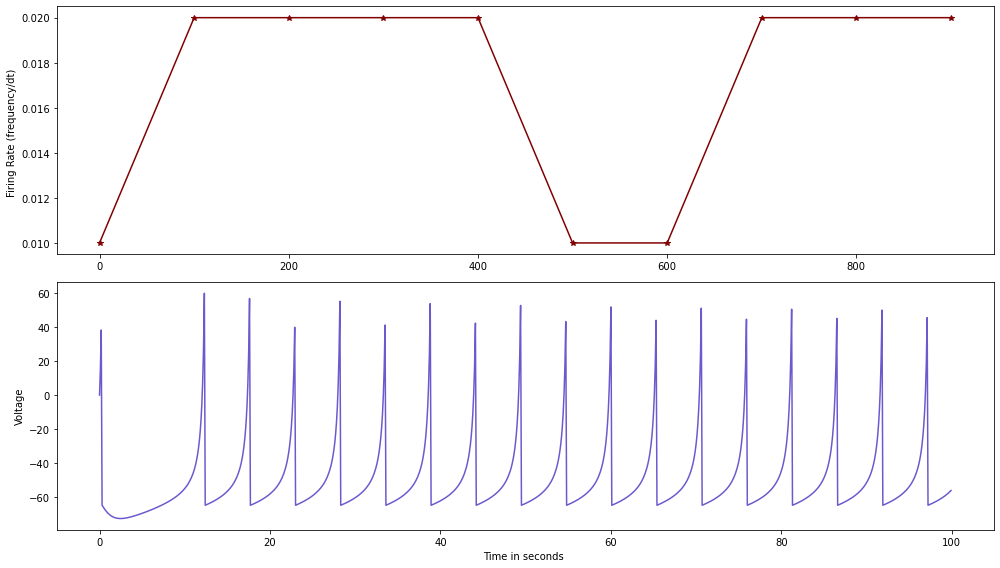

For model parameters [0.02, 0.25, -65, 2, 10]


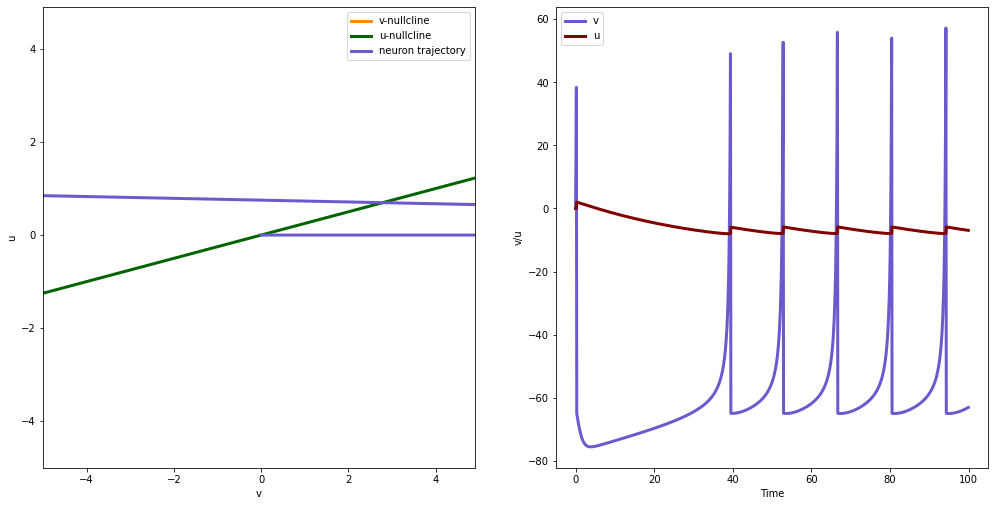

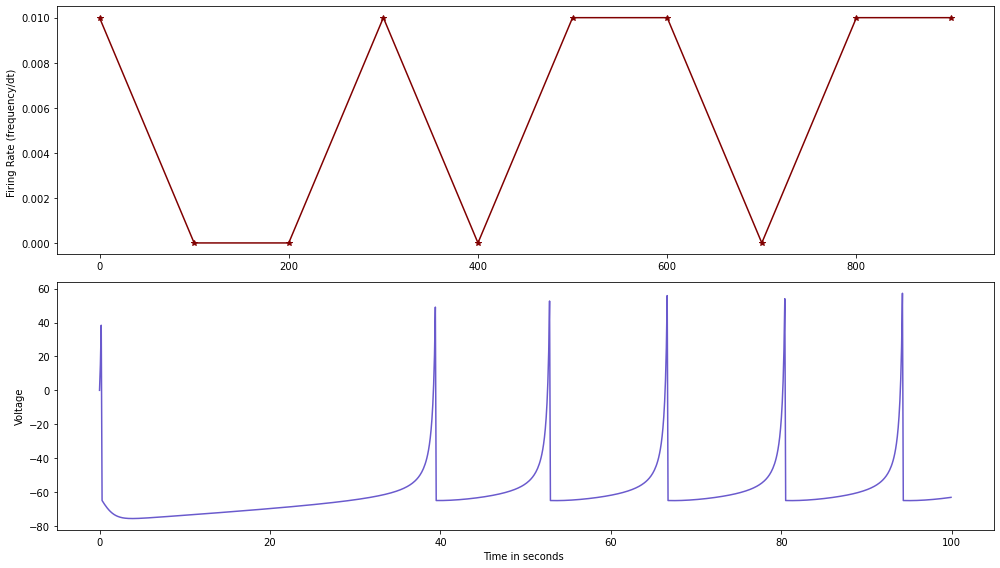

In [55]:
for params in [params_rs,params_ib,params_ch,params_fs,params_tc,params_rz,params_lts]:
    # storage for sequence of states
    # each row is a state
    # Each state is a pair (var1,var2) describing current value of DE variables
    #      d (var1)/dt = f(var1, var2)
    #      d (var2)/dt =  g(var1,var2)
    states = np.zeros((int(tstop/dt),2))

    for i in range(states.shape[0]):
        if i == 0:
            states[i,:] = [0,0]
        else:
            states[i,:] = get_next_state(states[i-1,:],params,dt)    

    freq=find_freq(states)
    
    #define range of var1 and var2 to display
    range1 = np.arange(-5,5,0.1) #Change range
    range2 = np.arange(-5,5,0.1) #Change range
    
    # Create a figure with two pairs of axes for phase plot and time plot
    fig = plt.figure(figsize = [15,8])
    phax = fig.add_axes([.075,.1,.4,.8])
    timax = fig.add_axes([.55,.1,.4,.8])
    fig2,freqax = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
    # freqax = fig2.add_subplot(111)
    # freqax2=fig2.add_subplot(121)

    print("For model parameters",params)
    # Display nullcline and trajectory of neuron in phase space
    phax.plot(range1,get_var1_nullcline(params,range1),color='darkorange',linewidth=3,label='v-nullcline')
    phax.plot(range1,get_var2_nullcline(params,range1),color='darkgreen',linewidth=3,label='u-nullcline')
    phax.plot(states[:,0],states[:,1],color='slateblue',linewidth=3,label='neuron trajectory')
    
    # Display trajectory of var1 and var2 with time
    timax.plot(np.arange(0,tstop,dt),states[:,0],color='slateblue',linewidth=3,label='v')
    timax.plot(np.arange(0,tstop,dt),states[:,1],color='maroon',linewidth=3,label='u')
    
   
    freqax[0].plot(np.arange(0,1000,100),freq,color='maroon',marker="*")
    freqax[0].set_xlabel("")
    freqax[0].set_ylabel("Firing Rate (frequency/dt) ")
    freqax[1].plot(np.arange(0,tstop,dt),states[:,0],color='slateblue')
    freqax[1].set_ylabel("Voltage")
    freqax[1].set_xlabel("Time in seconds ")
    plt.tight_layout()
    
    # Set legends and other graph parameters
    phax.set_xlabel('v')
    phax.set_ylabel('u')
    timax.set_xlabel('Time')
    timax.set_ylabel('v/u')
    phax.set_xlim(min(range1),max(range1))
    phax.set_ylim(min(range2),max(range2))
    phax.legend(loc=0)
    timax.legend(loc=0)
    plt.show()
